### Pour ce TP 2 vous n'aurez pas d'indication sur la routine d'analyse notamment les NAN, les min, les max, les describe etc. bref ce qui a été vu au cours précédent. 
### Les exercices ne sont pas forcément à faire dans l'ordre !

# Partie 1 : Étude de la liaison entre variables quantitatives

## DataSet : "Voiture_Conso.xlsx"

In [3]:
import pandas as pd
import numpy as np
file_name = 'Voiture_Conso.csv'
df = pd.read_csv(file_name)
df.head()

In [15]:
df.describe(include='all')

,Numero,Modele,Cylindree,Puissance,Poids,Conso
count,28.000000,28,28.000000,28.000000,28.000000,28
unique,NaN,28,NaN,NaN,NaN,23
top,NaN,Peugeot 806 2.0,NaN,NaN,NaN,"10,8"
freq,NaN,1,NaN,NaN,NaN,3
mean,14.500000,NaN,1809.071429,77.714286,1196.964286,NaN
std,8.225975,NaN,623.661229,32.256905,308.992806,NaN
min,1.000000,NaN,658.000000,29.000000,650.000000,NaN
25%,7.750000,NaN,1375.250000,54.750000,996.250000,NaN
50%,14.500000,NaN,1983.500000,79.500000,1140.000000,NaN
75%,21.250000,NaN,2232.500000,98.000000,1425.000000,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 6 columns):
Numero        28 non-null int64
Modele        28 non-null object
Cylindree     28 non-null int64
Puissance     28 non-null int64
Poids         28 non-null int64
Conso         28 non-null object
dtypes: int64(4), object(2)
memory usage: 1.4+ KB


In [30]:
df.columns

Index(['Numero', 'Modele', 'Cylindree ', 'Puissance ', 'Poids ', 'Conso'], dtype='object')

In [37]:
df['Cylindree ']

0      846
1      993
2      899
3     1390
4     1195
5      658
6     1331
7     1597
8     1761
9     2165
10    1983
11    1984
12    1998
13    1580
14    1390
15    1396
16    2435
17    1242
18    2972
19    2958
20    2497
21    1998
22    2496
23    1998
24    1997
25    1984
26    2438
27    2473
Name: Cylindree , dtype: int64

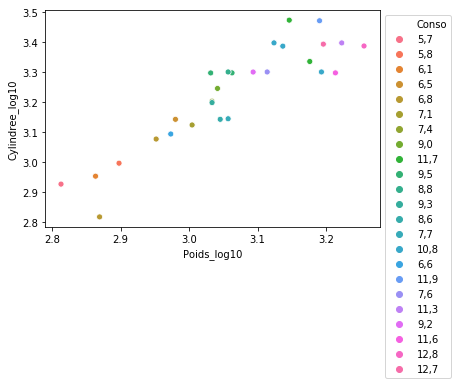

In [127]:
df["Poids_log10"] = np.log10(df['Poids '])
df["Cylindree_log10"] = np.log10(df['Cylindree '])
scatterplot = sns.scatterplot(x='Poids_log10', y='Cylindree_log10', hue='Conso', data=df)
scatterplot.legend(bbox_to_anchor=(1,1))
plt.show()

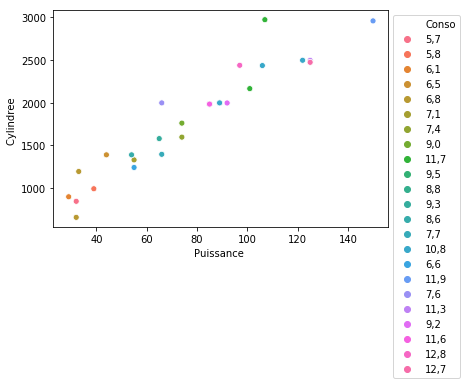

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

scatterplot = sns.scatterplot(x='Puissance ', y='Cylindree ', hue='Conso', data=df)
scatterplot.legend(bbox_to_anchor=(1,1))
plt.show()

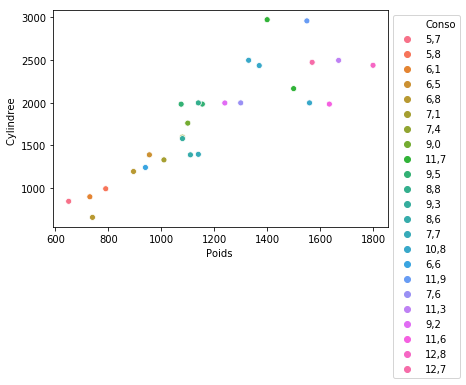

In [61]:
scatterplot2 = sns.scatterplot(x='Poids ', y='Cylindree ', hue='Conso', data=df)
scatterplot2.legend(bbox_to_anchor=(1,1))
plt.show()

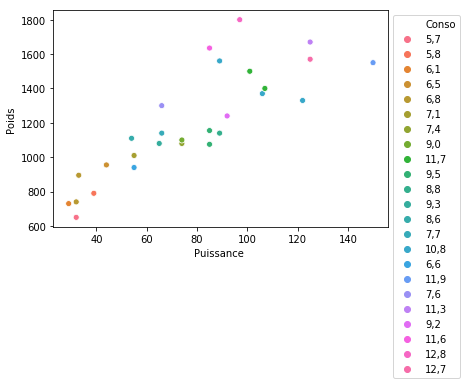

In [84]:
scatterplot3 = sns.scatterplot(x='Puissance ', y='Poids ', hue='Conso', data=df)
scatterplot3.legend(bbox_to_anchor=(1,1))
plt.show()

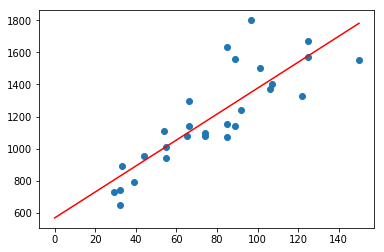

In [102]:
import scipy.stats
x = np.array(df['Puissance '])
y = np.array(df['Poids '])
z = np.array(df['Cylindree '])
X = x.reshape(-1,1)
Y = y.reshape(-1,1)
Z = z.reshape(-1,1)
xy = np.array([df['Puissance '],
                df['Poids ']])
result = scipy.stats.linregress(xy)
plt.scatter(X,Y)
ordonnee = np.linspace(0,150)
plt.plot(ordonnee, result.slope*ordonnee+result.intercept, color='r')

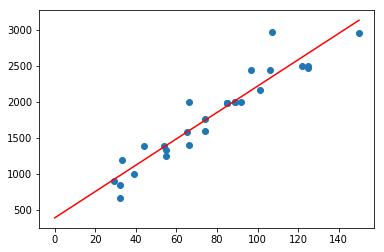

In [103]:
xz = np.array([df['Puissance '],
                df['Cylindree ']])
result = scipy.stats.linregress(xz)
plt.scatter(X,Z)
plt.plot(ordonnee, result.slope*ordonnee+result.intercept, color='r')

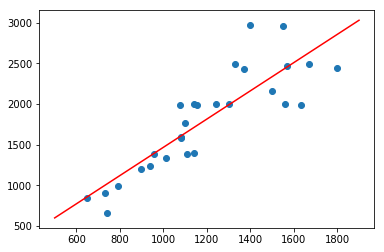

In [104]:
yz = np.array([df['Poids '],
                df['Cylindree ']])
result = scipy.stats.linregress(yz)
plt.scatter(Y,Z)
ordonnee = np.linspace(500,1900)
plt.plot(ordonnee, result.slope*ordonnee+result.intercept, color='r')

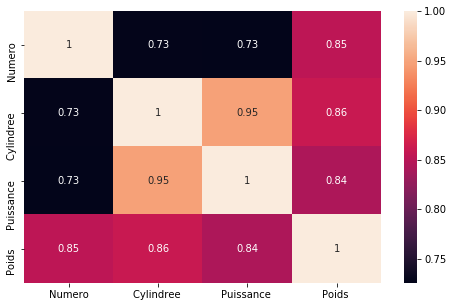

In [167]:

corr_df = df.corr(method='pearson')
plt.figure(figsize=(8,5))
sns.heatmap(corr_df, annot=True)
plt.show()

In [184]:
df_scaled = df.loc[:, ['Numero', 'Cylindree ', 'Poids ', 'Puissance ']]
df_scaled = df_scaled.apply(lambda x : (x-x.mean())/x.std())
df_scaled.describe(include='all')

,Numero,Cylindree,Poids,Puissance
count,2.800000e+01,2.800000e+01,2.800000e+01,2.800000e+01
mean,2.379049e-17,-1.665335e-16,-2.061843e-16,1.744636e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.641143e+00,-1.845668e+00,-1.770152e+00,-1.510197e+00
25%,-8.205714e-01,-6.956043e-01,-6.495759e-01,-7.119184e-01
50%,0.000000e+00,2.796848e-01,-1.843547e-01,5.535913e-02
75%,8.205714e-01,6.789400e-01,7.379968e-01,6.288797e-01
max,1.641143e+00,1.864680e+00,1.951617e+00,2.240938e+00


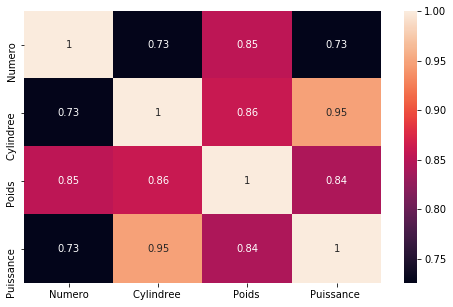

In [185]:
corr_df = df_scaled.corr(method='pearson')
plt.figure(figsize=(8,5))
sns.heatmap(corr_df, annot=True)
plt.show()

# Partie 2 : Étude de la liaison entre variables qualitatives

## DataSet 2.1 "Quantitatif.txt" (vu en cours)

In [129]:
df_quali = pd.read_table('qualitatif.txt',delimiter=' ')
df_quali.head()

,cheveux,yeux,sexe
0,Noir,Marron,Male
1,Blond,Bleu,Femelle
2,Noir,Bleu,Male
3,Marron,Marron,Femelle
4,Roux,Marron,Male


In [130]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 3 columns):
cheveux    592 non-null object
yeux       592 non-null object
sexe       592 non-null object
dtypes: object(3)
memory usage: 14.0+ KB


In [134]:
pd.crosstab([df_quali.yeux, df_quali.sexe], df_quali.cheveux, margins=True)

cheveux           Blond  Marron  Noir  Roux  All
yeux     sexe                                   
Bleu     Femelle     64      34     9     7  114
         Male        30      50    11    10  101
Marron   Femelle      4      81    36    16  137
         Male         3      38    32    10   83
Noisette Femelle      5      29     5     7   46
         Male         5      25    10     7   47
Vert     Femelle      8      14     2     7   31
         Male         8      15     3     7   33
All                 127     286   108    71  592

In [135]:
pd.crosstab([df_quali.cheveux, df_quali.sexe], df_quali.yeux, margins=True)

yeux             Bleu  Marron  Noisette  Vert  All
cheveux sexe                                      
Blond   Femelle    64       4         5     8   81
        Male       30       3         5     8   46
Marron  Femelle    34      81        29    14  158
        Male       50      38        25    15  128
Noir    Femelle     9      36         5     2   52
        Male       11      32        10     3   56
Roux    Femelle     7      16         7     7   37
        Male       10      10         7     7   34
All               215     220        93    64  592

In [137]:
pd.pivot_table(df_quali, index=['cheveux'], columns=['sexe'], aggfunc='count')

yeux     
sexe    Femelle Male
cheveux             
Blond        81   46
Marron      158  128
Noir         52   56
Roux         37   34

In [141]:
pd.pivot_table(df_quali, index=['cheveux'], columns=['yeux'], aggfunc='count')

sexe                     
yeux    Bleu Marron Noisette Vert
cheveux                          
Blond     94      7       10   16
Marron    84    119       54   29
Noir      20     68       15    5
Roux      17     26       14   14

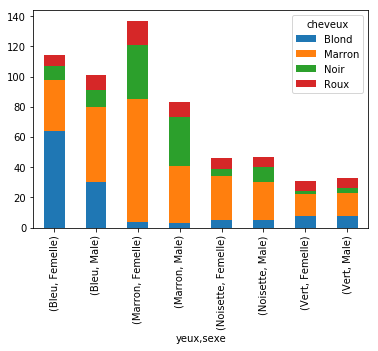

In [145]:
pd.crosstab([df_quali.yeux, df_quali.sexe], df_quali.cheveux).plot.bar(stacked=True)

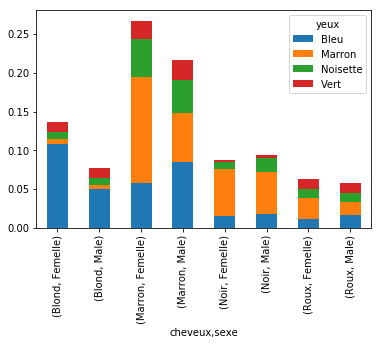

In [147]:
pd.crosstab([df_quali.cheveux, df_quali.sexe], df_quali.yeux, normalize=True).plot.bar(stacked=True)

In [162]:
df_quali.groupby(by=['sexe', 'cheveux']).count()

yeux
sexe    cheveux      
Femelle Blond      81
        Marron    158
        Noir       52
        Roux       37
Male    Blond      46
        Marron    128
        Noir       56
        Roux       34

In [165]:
df_quali.groupby(by=['sexe', 'yeux']).count()

cheveux
sexe    yeux             
Femelle Bleu          114
        Marron        137
        Noisette       46
        Vert           31
Male    Bleu          101
        Marron         83
        Noisette       47
        Vert           33

## DataSet 2.2 (intégré dans le code) Indépendance de variable qualitatives

Aujourd’hui, il vous prend la soudaine envie de faire des statistiques sur les habitants de votre ville. Vous souhaitez connaître leurs boissons préférées parmi celles-ci : café, thé, eau, ou autre.

Vous réalisez donc votre enquête en vous rendant dans les cafés pour observer discrètement les clients et noter la boisson qu’ils ont commandé. Vous souhaitez rassembler un échantillon de 100 personnes. Pour chacune d’elle, vous avez noté la boisson commandée et le nom du café dans lequel vous l’avez observée. On appellera ces deux variables nom café et boisson préférée . Voici la distribution que vous obtenez pour la variable boisson préférée:

    café : 50 personnes sur 100, soit f(cafe) = 50 %
    thé : 30 personnes sur 100, soit f(the) = 30 %
    autres boissons : 20 personnes sur 100, soit f(autre)= 20 %

Vous continuez votre enquête en vous rendant dans un café où il y a 10 clients. Combien de personnes vous attendez-vous à voir face à un thé ? Intuitivement, vous vous attendez à trouver 3 personnes qui ont commandé un thé car vous savez qu’en général, 30 % des personnes commandent un thé. Vous avez donc réalisé le calcul suivant : 30%*10 = 3.
De même, vous vous attentez à voir 5 personnes avec un café, et 2 personnes avec d’autres boissons.

A votre grande surprise, il y a en fait 9 personnes avec du thé, et seulement 1 avec un café ! Cela diffère beaucoup de ce à quoi vous vous attentiez : il y a 90 % de personnes qui boivent du thé. C'est peut-être un hasard, alors vous décidez de revenir régulièrement pour savoir si ce 90 % se confirme de jour en jour ou pas. Effectivement, ce pourcentage reste à peu près constant même après de nombreuses observations !

Mais vous comprenez vite pourquoi en regardant le nom du café : « Salon de thé Chez Luc ». Vous êtes dans un café un peu spécial : c’est un salon de thé ! Les clients qui fréquentent cet endroit sont donc principalement des amateurs de thé.

On dit alors que le fait d’aimer le thé et le fait de fréquenter le salon de thé Chez Luc ne sont pas indépendants. Si deux événements ne sont pas indépendants, alors on s’attend à trouver une corrélation entre ceux-ci. Vous souvenez de la question que l'on se pose pour les corrélations : Sachant que l'on connaît la valeur d'une variable, peut-on avoir une indication un peu plus précise sur la valeur d'une autre variable ?

QUESTION : Sachant qu’une personne fréquente le café Salon de thé Chez Luc, peut-on avoir une indication un peu plus précise sur sa boisson préférée ?

A FAIRE : utilisation du Khi_2 ... et bien sur tout ce qui va avant, tableau de contingence etc ...

In [35]:
# DataSet de votre enquête
# touchez à rien !

X = ["Chez Luc"]*10
X.extend(["Au café Dembas"]*20)
X.extend(["Au café Ducoing"]*40)
X.extend(["Chez Sarah"]*30)
 
Y = ["Café"]*1
Y.extend(["Thé"]*9)
Y.extend(["Autre"]*0)
 
Y.extend(["Café"]*9)
Y.extend(["Thé"]*6)
Y.extend(["Autre"]*5)
 
Y.extend(["Café"]*20)
Y.extend(["Thé"]*10)
Y.extend(["Autre"]*10)
 
Y.extend(["Café"]*20)
Y.extend(["Thé"]*5)
Y.extend(["Autre"]*5)
 
data = {
    'bar':X,
    'boisson':Y
}
df_Khi2 = pd.DataFrame(data)

In [6]:
df_Khi2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bar      100 non-null    object
 1   boisson  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [9]:
df_Khi2.columns

Index(['bar', 'boisson'], dtype='object')

In [13]:
df_Khi2.describe(include='all')

,bar,boisson
count,100,100
unique,4,3
top,Au café Ducoing,Café
freq,40,50


In [17]:
df_Khi2.bar.unique()

array(['Chez Luc', 'Au café Dembas', 'Au café Ducoing', 'Chez Sarah'],
      dtype=object)

In [21]:
pd.crosstab(df_Khi2.bar, df_Khi2.boisson, margins=True)

boisson,Autre,Café,Thé,All
bar,,,,
Au café Dembas,5,9,6,20
Au café Ducoing,10,20,10,40
Chez Luc,0,1,9,10
Chez Sarah,5,20,5,30
All,20,50,30,100


array([[<AxesSubplot:title={'center':'Au café Dembas'}>,
        <AxesSubplot:title={'center':'Au café Ducoing'}>],
       [<AxesSubplot:title={'center':'Chez Luc'}>,
        <AxesSubplot:title={'center':'Chez Sarah'}>]], dtype=object)

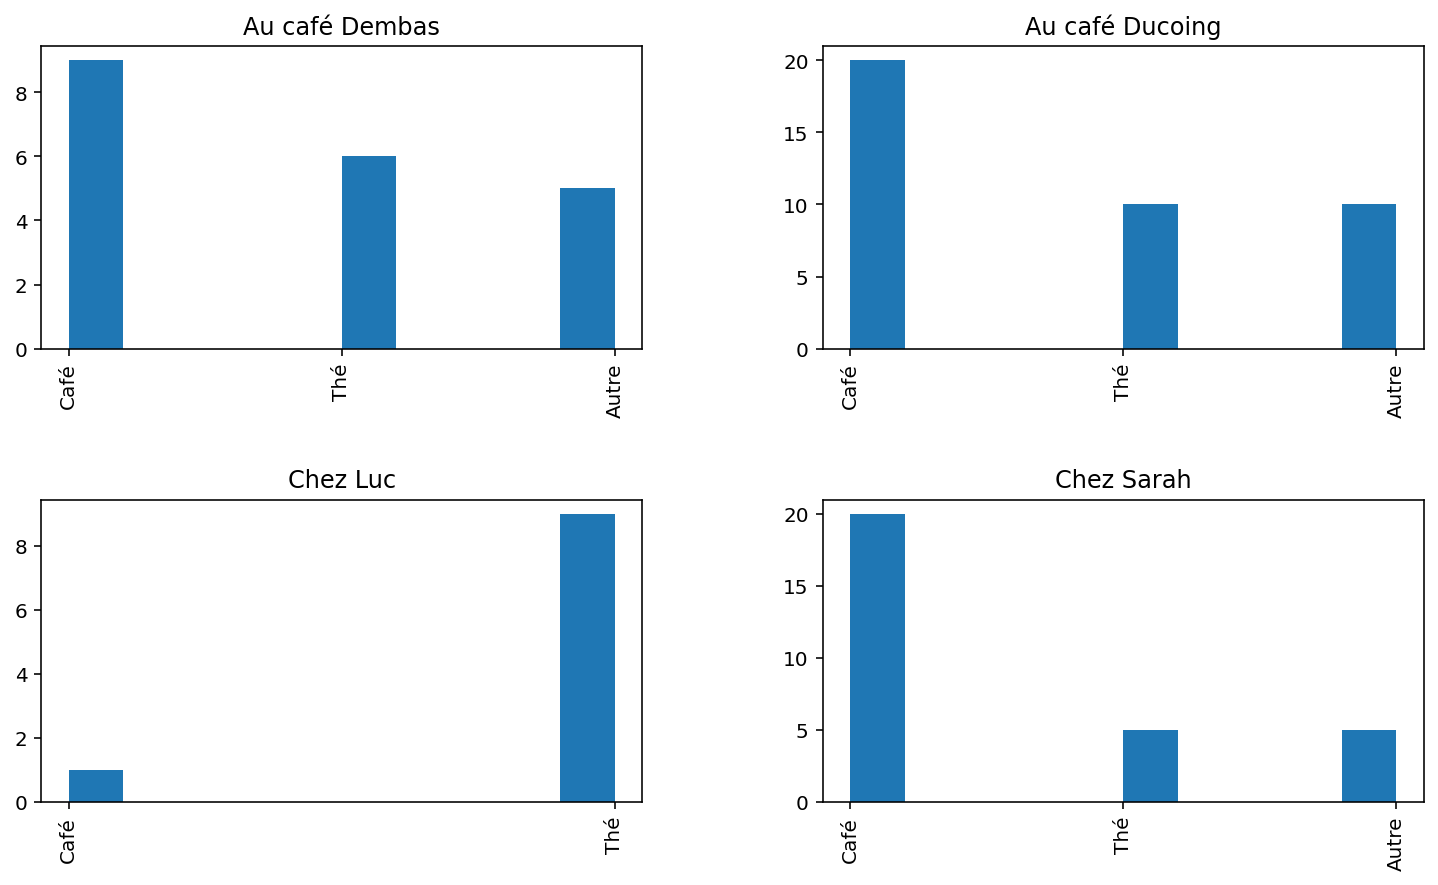

In [27]:
df_Khi2['boisson'].hist(by=df_Khi2['bar'])

<AxesSubplot:xlabel='bar'>

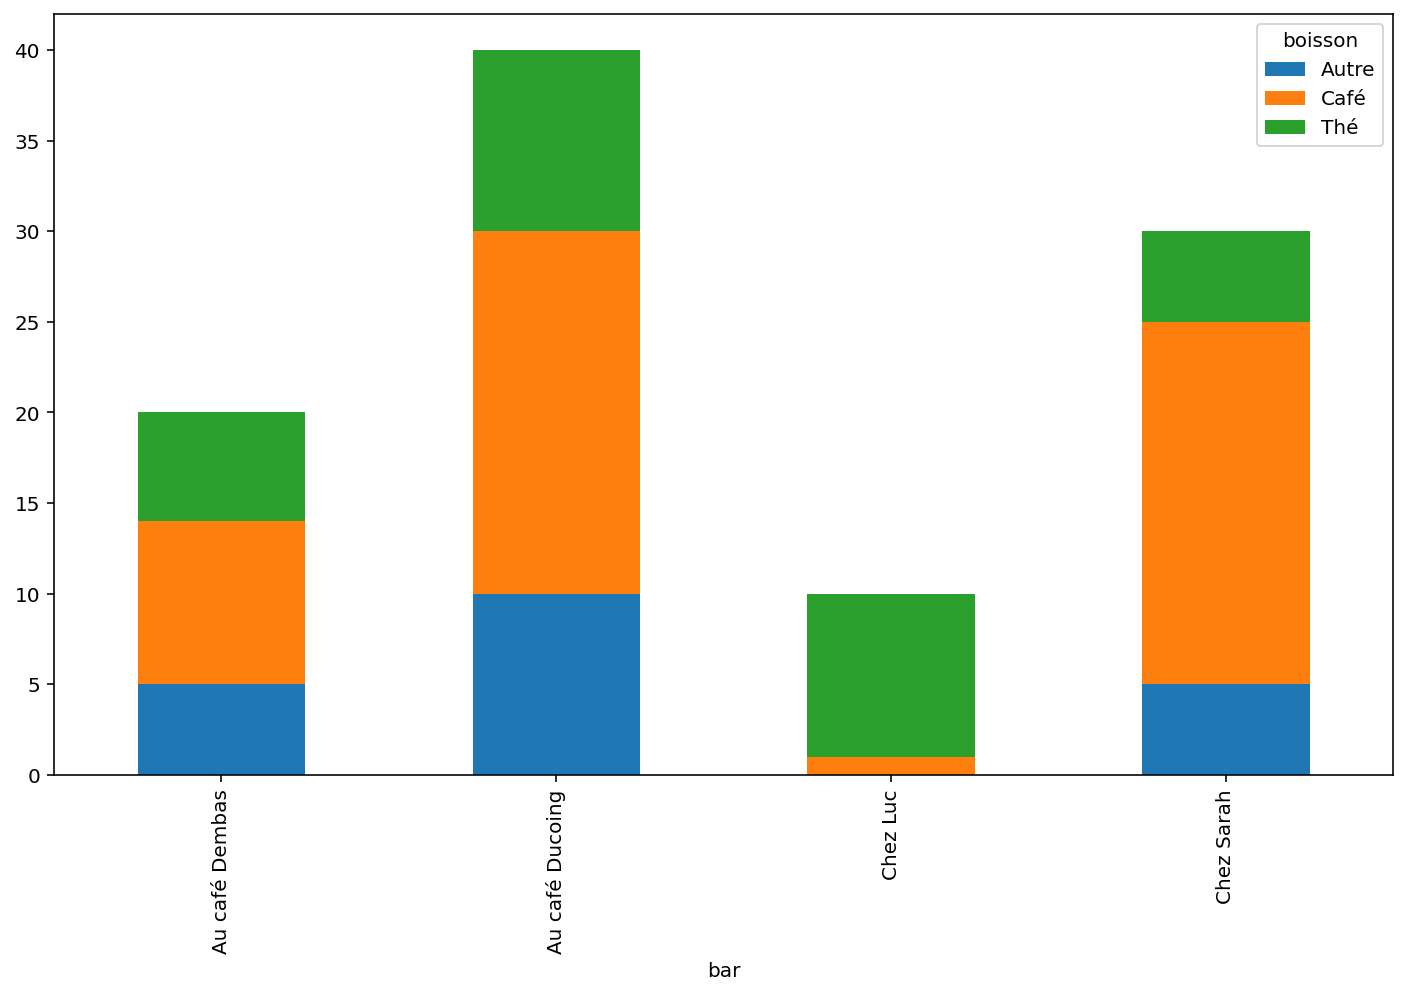

In [23]:
pd.crosstab(df_Khi2.bar, df_Khi2.boisson).plot.bar(stacked=True)

In [36]:
df_Khi2['bar'].value_counts()

Au café Ducoing    40
Chez Sarah         30
Au café Dembas     20
Chez Luc           10
Name: bar, dtype: int64

In [37]:
df_Khi2['boisson'].value_counts()

Café     50
Thé      30
Autre    20
Name: boisson, dtype: int64